#Importar Librearias

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.preprocessing import StandardScaler
# Librerías para métricas
import sklearn.metrics as metrics
# Clasificador CatBoost
from catboost import CatBoostClassifier

#Entendiendo los datos

##Leer datos

In [ ]:
df_train = pd.read_csv('kaggle_train_alpha.csv')
df_test = pd.read_csv('kaggle_test_alpha.csv')

##vision general

In [ ]:
df_train.head()

,CÓDIGO,PERIODO_RESULTADOS,CARRERA_PROFESIONAL,CIUDAD,COSTO_MATRÍCULA_SOLES,HORAS_SEMANALES_TRABAJO,NIVEL_SOCIECONÓMICO_VIVIENDA,CUENTA_CON_INTERNET,NIVEL_EDUCATIVO_PADRE,CUENTA_CON_LAVADORA,TIENE_CARRO,ANTECEDENTES_PENALES,PAGÓ_MATRÍCULA_POR_SU_CUENTA,CUENTA_CON_ORDENADOR,CUENTA_CON_INTERNET.1,NIVEL_EDUCATIVO_MADRE,RENDIMIENTO_ACADÉMICO
0,133959,20203,ADMINISTRACIÓN EN SALUD OCUPACIONAL,LIMA,Entre 850 y menos de 2000 soles,Entre 11 y 20 horas,Nivel D,No,Primaria incompleta,Si,Si,N,Si,No,No,Primaria incompleta,medio-bajo
1,784510,20212,ADMINISTRACION DE EMPRESAS,LIMA,Entre 850 y menos de 2000 soles,Más de 30 horas,Nivel C,Si,Primaria incompleta,Si,No,N,Si,Si,Si,Primaria incompleta,medio-alto
2,535024,20183,INGENIERIA AMBIENTAL Y SANITARIA,CAJAMARCA,Entre 850 y menos de 2000 soles,Menos de 10 horas,Nivel D,No,Primaria completa,Si,No,N,No,Si,No,Primaria completa,medio-alto
3,591650,20212,CONTADURIA PUBLICA,LIMA,Entre 850 y menos de 2000 soles,Más de 30 horas,Nivel C,Si,Primaria incompleta,Si,No,N,No,Si,Si,Primaria completa,medio-bajo
4,635933,20195,CONTADURIA PUBLICA,PIURA,Entre 2000 y menos de 3500 soles,Más de 30 horas,Nivel C,Si,Educación profesional completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto


In [ ]:
df_test.head()

,CÓDIGO,PERIODO_RESULTADOS,CARRERA_PROFESIONAL,CIUDAD,COSTO_MATRÍCULA_SOLES,HORAS_SEMANALES_TRABAJO,NIVEL_SOCIECONÓMICO_VIVIENDA,CUENTA_CON_INTERNET,NIVEL_EDUCATIVO_PADRE,CUENTA_CON_LAVADORA,TIENE_CARRO,ANTECEDENTES_PENALES,PAGÓ_MATRÍCULA_POR_SU_CUENTA,CUENTA_CON_ORDENADOR,CUENTA_CON_INTERNET.1,NIVEL_EDUCATIVO_MADRE
0,345759,20195,ADMINISTRACION POLICIAL,LIMA,Entre 2000 y menos de 3500 soles,Entre 21 y 30 horas,Nivel D,Si,Secundaria (Bachillerato) completa,Si,Si,N,No,Si,Si,Educación profesional completa
1,925052,20195,MEDICINA,PUCALLPA,Entre 850 y menos de 2000 soles,0,Nivel B,Si,Educación profesional completa,Si,Si,N,Si,Si,Si,Educación profesional completa
2,383355,20212,CONTADURIA PUBLICA,LIMA,Entre 3500 y menos de 4800 soles,Más de 30 horas,Nivel B,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Primaria completa
3,70065,20183,LICENCIATURA EN IDIOMAS EXTRANJEROS,TRUJILLO,Entre 600 y menos de 850 soles,Entre 21 y 30 horas,Nivel B,Si,Educación profesional completa,Si,Si,N,Si,Si,Si,Educación profesional completa
4,8675,20195,LICENCIATURA EN MATEMATICAS,MOQUEGUA,Menos de 600 soles,0,Nivel E,No,Ninguno,No,No,N,No,No,No,Ninguno


In [ ]:
df_train.shape

(554000, 17)

In [ ]:
df_test.shape

(138500, 16)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554000 entries, 0 to 553999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CÓDIGO                        554000 non-null  int64 
 1   PERIODO_RESULTADOS            554000 non-null  int64 
 2   CARRERA_PROFESIONAL           554000 non-null  object
 3   CIUDAD                        554000 non-null  object
 4   COSTO_MATRÍCULA_SOLES         548957 non-null  object
 5   HORAS_SEMANALES_TRABAJO       529330 non-null  object
 6   NIVEL_SOCIECONÓMICO_VIVIENDA  528330 non-null  object
 7   CUENTA_CON_INTERNET           532749 non-null  object
 8   NIVEL_EDUCATIVO_PADRE         535448 non-null  object
 9   CUENTA_CON_LAVADORA           522281 non-null  object
 10  TIENE_CARRO                   519221 non-null  object
 11  ANTECEDENTES_PENALES          554000 non-null  object
 12  PAGÓ_MATRÍCULA_POR_SU_CUENTA  548782 non-null  object
 13 

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138500 entries, 0 to 138499
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CÓDIGO                        138500 non-null  int64 
 1   PERIODO_RESULTADOS            138500 non-null  int64 
 2   CARRERA_PROFESIONAL           138500 non-null  object
 3   CIUDAD                        138500 non-null  object
 4   COSTO_MATRÍCULA_SOLES         137256 non-null  object
 5   HORAS_SEMANALES_TRABAJO       132313 non-null  object
 6   NIVEL_SOCIECONÓMICO_VIVIENDA  132033 non-null  object
 7   CUENTA_CON_INTERNET           133122 non-null  object
 8   NIVEL_EDUCATIVO_PADRE         133874 non-null  object
 9   CUENTA_CON_LAVADORA           130446 non-null  object
 10  TIENE_CARRO                   129656 non-null  object
 11  ANTECEDENTES_PENALES          138500 non-null  object
 12  PAGÓ_MATRÍCULA_POR_SU_CUENTA  137220 non-null  object
 13 

##Ver valores duplicados

In [ ]:
df_train.duplicated().sum()

0

##Valores nulos

In [ ]:
df_train.isnull().sum().sort_values(ascending=False)

,0
TIENE_CARRO,34779
CUENTA_CON_LAVADORA,31719
CUENTA_CON_ORDENADOR,30375
NIVEL_SOCIECONÓMICO_VIVIENDA,25670
HORAS_SEMANALES_TRABAJO,24670
CUENTA_CON_INTERNET.1,21251
CUENTA_CON_INTERNET,21251
NIVEL_EDUCATIVO_MADRE,18928
NIVEL_EDUCATIVO_PADRE,18552
PAGÓ_MATRÍCULA_POR_SU_CUENTA,5218


##valores unicos

In [ ]:
df_train.nunique()

,0
CÓDIGO,554000
PERIODO_RESULTADOS,9
CARRERA_PROFESIONAL,941
CIUDAD,31
COSTO_MATRÍCULA_SOLES,8
HORAS_SEMANALES_TRABAJO,5
NIVEL_SOCIECONÓMICO_VIVIENDA,6
CUENTA_CON_INTERNET,2
NIVEL_EDUCATIVO_PADRE,12
CUENTA_CON_LAVADORA,2


In [ ]:
columnas_categoricas = df_train.select_dtypes(include=['object']).columns
for column in columnas_categoricas:
  if df_train[column].nunique() < 10:
    print(f"{column}: {df_train[column].unique()}")

COSTO_MATRÍCULA_SOLES: ['Entre 850 y menos de 2000 soles' 'Entre 2000 y menos de 3500 soles'
 'Menos de 600 soles' nan 'Más de 6000 soles'
 'Entre 3500 y menos de 4800 soles' 'Entre 4800 y menos de 6000 soles'
 'Entre 600 y menos de 850 soles' 'No pagó matrícula']
HORAS_SEMANALES_TRABAJO: ['Entre 11 y 20 horas' 'Más de 30 horas' 'Menos de 10 horas'
 'Entre 21 y 30 horas' '0' nan]
NIVEL_SOCIECONÓMICO_VIVIENDA: ['Nivel D' 'Nivel C' 'Nivel E' nan 'Nivel B' 'Nivel A' 'Sin Clasificación']
CUENTA_CON_INTERNET: ['No' 'Si' nan]
CUENTA_CON_LAVADORA: ['Si' 'No' nan]
TIENE_CARRO: ['Si' 'No' nan]
ANTECEDENTES_PENALES: ['N' 'S']
PAGÓ_MATRÍCULA_POR_SU_CUENTA: ['Si' 'No' nan]
CUENTA_CON_ORDENADOR: ['No' 'Si' nan]
CUENTA_CON_INTERNET.1: ['No' 'Si' nan]
RENDIMIENTO_ACADÉMICO: ['medio-bajo' 'medio-alto' 'bajo' 'alto']


In [ ]:
columnas_categoricas = df_train.select_dtypes(include=['int64', 'float64']).columns
for column in columnas_categoricas:
  if df_train[column].nunique() < 10:
    print(f"{column}: {df_train[column].unique()}")

PERIODO_RESULTADOS: [20203 20212 20183 20195 20194 20213 20184 20196 20202]


##Rendimiento academico

In [ ]:
print(df_train.groupby('RENDIMIENTO_ACADÉMICO').size())

RENDIMIENTO_ACADÉMICO
alto          140454
bajo          138414
medio-alto    137360
medio-bajo    137772
dtype: int64


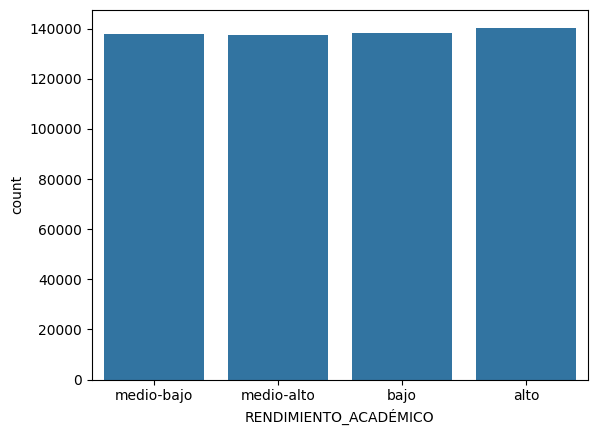

In [ ]:
sns.countplot(x='RENDIMIENTO_ACADÉMICO', data=df_train)
plt.show()

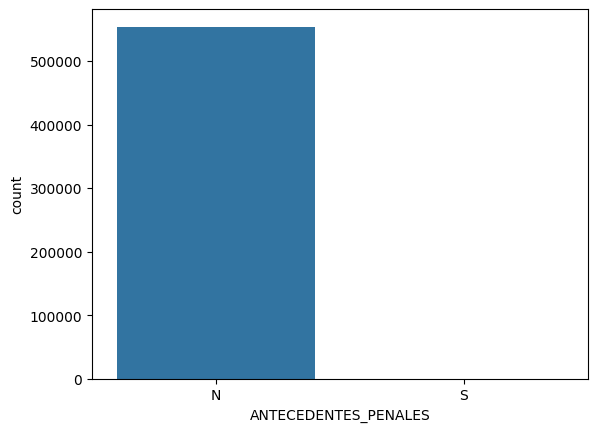

In [ ]:
sns.countplot(x='ANTECEDENTES_PENALES', data=df_train)
plt.show()

##comparar posibles columnas iguales

In [ ]:
# Comparar las columnas
column_comparison = df_train['CUENTA_CON_INTERNET'] == df_train['CUENTA_CON_INTERNET.1']

# Verificar si todas las filas son iguales
all_equal = column_comparison.all()

# Resultados
if all_equal:
    print("Las columnas CUENTA_CON_INTERNET y CUENTA_CON_INTERNET.1 son idénticas.")
else:
    print("Las columnas CUENTA_CON_INTERNET y CUENTA_CON_INTERNET.1 no son idénticas.")
    # Opcional: Mostrar las diferencias
    print("Diferencias encontradas en las siguientes filas:")
    print(df_train[~column_comparison])

Las columnas CUENTA_CON_INTERNET y CUENTA_CON_INTERNET.1 no son idénticas.
Diferencias encontradas en las siguientes filas:
        CÓDIGO  PERIODO_RESULTADOS                 CARRERA_PROFESIONAL  \
11      744147               20195  LICENCIATURA EN PEDAGOGIA INFANTIL   
21      369741               20195          ADMINISTRACIÓN DE EMPRESAS   
28      898429               20195     COMUNICACION SOCIAL- PERIODISMO   
78      132709               20195              INGENIERIA DE SISTEMAS   
121     414747               20183                INGENIERIA AMBIENTAL   
...        ...                 ...                                 ...   
553762  598275               20203                         MATEMATICAS   
553856  679190               20203               INGENIERIA INDUSTRIAL   
553935  446868               20195              INGENIERIA ELECTRONICA   
553965   58580               20183                  CONTADURIA PUBLICA   
553999  716865               20183                 TERAPIA OCU

##Conclusiones
Los datos estan muy equilibrados, solo el código y ANTECEDENTES_PENALES son innecesario

In [ ]:
CodigoEstudiantes = df_test['CÓDIGO']
df_train=df_train.drop(['CÓDIGO', 'ANTECEDENTES_PENALES'], axis=1)
df_test=df_test.drop(['CÓDIGO', 'ANTECEDENTES_PENALES'], axis=1)
df_train.head()

,PERIODO_RESULTADOS,CARRERA_PROFESIONAL,CIUDAD,COSTO_MATRÍCULA_SOLES,HORAS_SEMANALES_TRABAJO,NIVEL_SOCIECONÓMICO_VIVIENDA,CUENTA_CON_INTERNET,NIVEL_EDUCATIVO_PADRE,CUENTA_CON_LAVADORA,TIENE_CARRO,PAGÓ_MATRÍCULA_POR_SU_CUENTA,CUENTA_CON_ORDENADOR,CUENTA_CON_INTERNET.1,NIVEL_EDUCATIVO_MADRE,RENDIMIENTO_ACADÉMICO
0,20203,ADMINISTRACIÓN EN SALUD OCUPACIONAL,LIMA,Entre 850 y menos de 2000 soles,Entre 11 y 20 horas,Nivel D,No,Primaria incompleta,Si,Si,Si,No,No,Primaria incompleta,medio-bajo
1,20212,ADMINISTRACION DE EMPRESAS,LIMA,Entre 850 y menos de 2000 soles,Más de 30 horas,Nivel C,Si,Primaria incompleta,Si,No,Si,Si,Si,Primaria incompleta,medio-alto
2,20183,INGENIERIA AMBIENTAL Y SANITARIA,CAJAMARCA,Entre 850 y menos de 2000 soles,Menos de 10 horas,Nivel D,No,Primaria completa,Si,No,No,Si,No,Primaria completa,medio-alto
3,20212,CONTADURIA PUBLICA,LIMA,Entre 850 y menos de 2000 soles,Más de 30 horas,Nivel C,Si,Primaria incompleta,Si,No,No,Si,Si,Primaria completa,medio-bajo
4,20195,CONTADURIA PUBLICA,PIURA,Entre 2000 y menos de 3500 soles,Más de 30 horas,Nivel C,Si,Educación profesional completa,Si,No,No,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto


In [ ]:
CodigoEstudiantes.head()

,CÓDIGO
0,345759
1,925052
2,383355
3,70065
4,8675


#Preparación de los datos

##Rellenar valores null

In [ ]:
# Rellenar valores nulos en columnas categóricas con la moda
for col in df_test.select_dtypes(include=['object', 'category']).columns:
    mode_value = df_test[col].mode()[0]  # Obtiene el valor más frecuente (modo)
    df_train[col] = df_train[col].fillna(mode_value)
    df_test[col] = df_test[col].fillna(mode_value)

In [ ]:
df_train.shape

(554000, 15)

In [ ]:
df_test.shape

(138500, 14)

In [ ]:
df_train.isnull().sum().sort_values(ascending=False)

,0
PERIODO_RESULTADOS,0
CARRERA_PROFESIONAL,0
CIUDAD,0
COSTO_MATRÍCULA_SOLES,0
HORAS_SEMANALES_TRABAJO,0
NIVEL_SOCIECONÓMICO_VIVIENDA,0
CUENTA_CON_INTERNET,0
NIVEL_EDUCATIVO_PADRE,0
CUENTA_CON_LAVADORA,0
TIENE_CARRO,0


In [ ]:
df_test.isnull().sum().sort_values(ascending=False)

,0
PERIODO_RESULTADOS,0
CARRERA_PROFESIONAL,0
CIUDAD,0
COSTO_MATRÍCULA_SOLES,0
HORAS_SEMANALES_TRABAJO,0
NIVEL_SOCIECONÓMICO_VIVIENDA,0
CUENTA_CON_INTERNET,0
NIVEL_EDUCATIVO_PADRE,0
CUENTA_CON_LAVADORA,0
TIENE_CARRO,0


##Separación de predictoras y targer

In [ ]:
X=df_train.drop(['RENDIMIENTO_ACADÉMICO'], axis=1)
y=df_train['RENDIMIENTO_ACADÉMICO']

In [ ]:
X.head()

,PERIODO_RESULTADOS,CARRERA_PROFESIONAL,CIUDAD,COSTO_MATRÍCULA_SOLES,HORAS_SEMANALES_TRABAJO,NIVEL_SOCIECONÓMICO_VIVIENDA,CUENTA_CON_INTERNET,NIVEL_EDUCATIVO_PADRE,CUENTA_CON_LAVADORA,TIENE_CARRO,PAGÓ_MATRÍCULA_POR_SU_CUENTA,CUENTA_CON_ORDENADOR,CUENTA_CON_INTERNET.1,NIVEL_EDUCATIVO_MADRE
0,20203,ADMINISTRACIÓN EN SALUD OCUPACIONAL,LIMA,Entre 850 y menos de 2000 soles,Entre 11 y 20 horas,Nivel D,No,Primaria incompleta,Si,Si,Si,No,No,Primaria incompleta
1,20212,ADMINISTRACION DE EMPRESAS,LIMA,Entre 850 y menos de 2000 soles,Más de 30 horas,Nivel C,Si,Primaria incompleta,Si,No,Si,Si,Si,Primaria incompleta
2,20183,INGENIERIA AMBIENTAL Y SANITARIA,CAJAMARCA,Entre 850 y menos de 2000 soles,Menos de 10 horas,Nivel D,No,Primaria completa,Si,No,No,Si,No,Primaria completa
3,20212,CONTADURIA PUBLICA,LIMA,Entre 850 y menos de 2000 soles,Más de 30 horas,Nivel C,Si,Primaria incompleta,Si,No,No,Si,Si,Primaria completa
4,20195,CONTADURIA PUBLICA,PIURA,Entre 2000 y menos de 3500 soles,Más de 30 horas,Nivel C,Si,Educación profesional completa,Si,No,No,Si,Si,Secundaria (Bachillerato) incompleta


In [ ]:
df_test.head()

,PERIODO_RESULTADOS,CARRERA_PROFESIONAL,CIUDAD,COSTO_MATRÍCULA_SOLES,HORAS_SEMANALES_TRABAJO,NIVEL_SOCIECONÓMICO_VIVIENDA,CUENTA_CON_INTERNET,NIVEL_EDUCATIVO_PADRE,CUENTA_CON_LAVADORA,TIENE_CARRO,ANTECEDENTES_PENALES,PAGÓ_MATRÍCULA_POR_SU_CUENTA,CUENTA_CON_ORDENADOR,CUENTA_CON_INTERNET.1,NIVEL_EDUCATIVO_MADRE
0,20195,ADMINISTRACION POLICIAL,LIMA,Entre 2000 y menos de 3500 soles,Entre 21 y 30 horas,Nivel D,Si,Secundaria (Bachillerato) completa,Si,Si,N,No,Si,Si,Educación profesional completa
1,20195,MEDICINA,PUCALLPA,Entre 850 y menos de 2000 soles,0,Nivel B,Si,Educación profesional completa,Si,Si,N,Si,Si,Si,Educación profesional completa
2,20212,CONTADURIA PUBLICA,LIMA,Entre 3500 y menos de 4800 soles,Más de 30 horas,Nivel B,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Primaria completa
3,20183,LICENCIATURA EN IDIOMAS EXTRANJEROS,TRUJILLO,Entre 600 y menos de 850 soles,Entre 21 y 30 horas,Nivel B,Si,Educación profesional completa,Si,Si,N,Si,Si,Si,Educación profesional completa
4,20195,LICENCIATURA EN MATEMATICAS,MOQUEGUA,Menos de 600 soles,0,Nivel E,No,Ninguno,No,No,N,No,No,No,Ninguno


In [ ]:
X.isnull().sum().sort_values(ascending=False)

,0
PERIODO_RESULTADOS,0
CARRERA_PROFESIONAL,0
CIUDAD,0
COSTO_MATRÍCULA_SOLES,0
HORAS_SEMANALES_TRABAJO,0
NIVEL_SOCIECONÓMICO_VIVIENDA,0
CUENTA_CON_INTERNET,0
NIVEL_EDUCATIVO_PADRE,0
CUENTA_CON_LAVADORA,0
TIENE_CARRO,0


## Analisis de Datos

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
datos5 = df_train.copy()
# Crear el transformador OrdinalEncoder
encoder = OrdinalEncoder()
# Transformar la columna categórica
datos5['CARRERA_PROFESIONAL'] = encoder.fit_transform(datos5[['CARRERA_PROFESIONAL']])
datos5['CIUDAD'] = encoder.fit_transform(datos5[['CIUDAD']])
datos5['COSTO_MATRÍCULA_SOLES'] = encoder.fit_transform(datos5[['COSTO_MATRÍCULA_SOLES']])
datos5['NIVEL_SOCIECONÓMICO_VIVIENDA'] = encoder.fit_transform(datos5[['NIVEL_SOCIECONÓMICO_VIVIENDA']])
datos5['CUENTA_CON_INTERNET'] = encoder.fit_transform(datos5[['CUENTA_CON_INTERNET']])
datos5['NIVEL_EDUCATIVO_PADRE'] = encoder.fit_transform(datos5[['NIVEL_EDUCATIVO_PADRE']])
datos5['CUENTA_CON_LAVADORA'] = encoder.fit_transform(datos5[['CUENTA_CON_LAVADORA']])
datos5['TIENE_CARRO'] = encoder.fit_transform(datos5[['TIENE_CARRO']])
datos5['ANTECEDENTES_PENALES'] = encoder.fit_transform(datos5[['ANTECEDENTES_PENALES']])
datos5['PAGÓ_MATRÍCULA_POR_SU_CUENTA'] = encoder.fit_transform(datos5[['PAGÓ_MATRÍCULA_POR_SU_CUENTA']])
datos5['CUENTA_CON_ORDENADOR'] = encoder.fit_transform(datos5[['CUENTA_CON_ORDENADOR']])
datos5['CUENTA_CON_INTERNET.1'] = encoder.fit_transform(datos5[['CUENTA_CON_INTERNET.1']])
datos5['NIVEL_EDUCATIVO_MADRE'] = encoder.fit_transform(datos5[['NIVEL_EDUCATIVO_MADRE']])
datos5['HORAS_SEMANALES_TRABAJO'] = encoder.fit_transform(datos5[['HORAS_SEMANALES_TRABAJO']])
datos5['RENDIMIENTO_ACADÉMICO'] = encoder.fit_transform(datos5[['RENDIMIENTO_ACADÉMICO']])
# Mostrar los resultados
datos5

,PERIODO_RESULTADOS,CARRERA_PROFESIONAL,CIUDAD,COSTO_MATRÍCULA_SOLES,HORAS_SEMANALES_TRABAJO,NIVEL_SOCIECONÓMICO_VIVIENDA,CUENTA_CON_INTERNET,NIVEL_EDUCATIVO_PADRE,CUENTA_CON_LAVADORA,TIENE_CARRO,ANTECEDENTES_PENALES,PAGÓ_MATRÍCULA_POR_SU_CUENTA,CUENTA_CON_ORDENADOR,CUENTA_CON_INTERNET.1,NIVEL_EDUCATIVO_MADRE,RENDIMIENTO_ACADÉMICO
0,20203,93.0,16.0,4.0,1.0,3.0,0.0,7.0,1.0,1.0,0.0,1.0,0.0,0.0,7.0,3.0
1,20212,13.0,16.0,4.0,4.0,2.0,1.0,7.0,1.0,0.0,0.0,1.0,1.0,1.0,7.0,2.0
2,20183,375.0,4.0,4.0,3.0,3.0,0.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0,6.0,2.0
3,20212,228.0,16.0,4.0,4.0,2.0,1.0,7.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,3.0
4,20195,228.0,20.0,0.0,4.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553994,20203,796.0,28.0,6.0,4.0,3.0,1.0,9.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,3.0
553995,20183,643.0,1.0,4.0,2.0,3.0,1.0,9.0,1.0,0.0,0.0,0.0,1.0,1.0,7.0,2.0
553996,20183,13.0,4.0,4.0,3.0,4.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
553997,20195,414.0,16.0,1.0,4.0,4.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,6.0,1.0


###Información mutua

In [ ]:
# Ejemplo en Python
correlation = datos5.corr()  # Correlación entre todas las variables numéricas
correlation_with_target = correlation['RENDIMIENTO_ACADÉMICO']

print(correlation_with_target)

PERIODO_RESULTADOS             -0.021378
CARRERA_PROFESIONAL            -0.031517
CIUDAD                          0.001793
COSTO_MATRÍCULA_SOLES          -0.129736
HORAS_SEMANALES_TRABAJO         0.096576
NIVEL_SOCIECONÓMICO_VIVIENDA    0.159592
CUENTA_CON_INTERNET            -0.054397
NIVEL_EDUCATIVO_PADRE           0.095772
CUENTA_CON_LAVADORA            -0.045554
TIENE_CARRO                    -0.101210
ANTECEDENTES_PENALES            0.000739
PAGÓ_MATRÍCULA_POR_SU_CUENTA    0.117445
CUENTA_CON_ORDENADOR           -0.049548
CUENTA_CON_INTERNET.1          -0.054397
NIVEL_EDUCATIVO_MADRE           0.105044
RENDIMIENTO_ACADÉMICO           1.000000
Name: RENDIMIENTO_ACADÉMICO, dtype: float64


In [ ]:
# Ordenar las correlaciones por su magnitud de mayor a menor
correlation_with_target = correlation['RENDIMIENTO_ACADÉMICO'].sort_values(ascending=False)

# Crear un DataFrame para mejor visualización
import pandas as pd
correlation_df = pd.DataFrame({
    'Variable': correlation_with_target.index,
    'Correlación': correlation_with_target.values
})

# Mostrar el DataFrame
print(correlation_df)


                        Variable  Correlación
0          RENDIMIENTO_ACADÉMICO     1.000000
1   NIVEL_SOCIECONÓMICO_VIVIENDA     0.159592
2   PAGÓ_MATRÍCULA_POR_SU_CUENTA     0.117445
3          NIVEL_EDUCATIVO_MADRE     0.105044
4        HORAS_SEMANALES_TRABAJO     0.096576
5          NIVEL_EDUCATIVO_PADRE     0.095772
6                         CIUDAD     0.001793
7           ANTECEDENTES_PENALES     0.000739
8             PERIODO_RESULTADOS    -0.021378
9            CARRERA_PROFESIONAL    -0.031517
10           CUENTA_CON_LAVADORA    -0.045554
11          CUENTA_CON_ORDENADOR    -0.049548
12           CUENTA_CON_INTERNET    -0.054397
13         CUENTA_CON_INTERNET.1    -0.054397
14                   TIENE_CARRO    -0.101210
15         COSTO_MATRÍCULA_SOLES    -0.129736


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Codificar variables categóricas antes
R = datos5.drop(columns=['RENDIMIENTO_ACADÉMICO'])
j = datos5['RENDIMIENTO_ACADÉMICO']
mutual_info = mutual_info_classif(R, j, discrete_features='auto')

print(mutual_info)

[0.00739204 0.10298522 0.02796623 0.07400159 0.02318715 0.04740422
 0.03326751 0.04788622 0.03260675 0.02561265 0.         0.03743525
 0.03164807 0.03333093 0.04898981]


In [ ]:
# Crear un DataFrame
mutual_info_df = pd.DataFrame({
    'Variable': R.columns,  # Nombres de las columnas (sin la variable objetivo)
    'Mutual Information': mutual_info  # Valores de información mutua
})

# Ordenar de mayor a menor
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Mostrar la tabla
print(mutual_info_df)


                        Variable  Mutual Information
1            CARRERA_PROFESIONAL            0.102985
3          COSTO_MATRÍCULA_SOLES            0.074002
14         NIVEL_EDUCATIVO_MADRE            0.048990
7          NIVEL_EDUCATIVO_PADRE            0.047886
5   NIVEL_SOCIECONÓMICO_VIVIENDA            0.047404
11  PAGÓ_MATRÍCULA_POR_SU_CUENTA            0.037435
13         CUENTA_CON_INTERNET.1            0.033331
6            CUENTA_CON_INTERNET            0.033268
8            CUENTA_CON_LAVADORA            0.032607
12          CUENTA_CON_ORDENADOR            0.031648
2                         CIUDAD            0.027966
9                    TIENE_CARRO            0.025613
4        HORAS_SEMANALES_TRABAJO            0.023187
0             PERIODO_RESULTADOS            0.007392
10          ANTECEDENTES_PENALES            0.000000


### Importancia de caracteristicas

In [ ]:
df_test.head()

,CARRERA_PROFESIONAL,CIUDAD,COSTO_MATRÍCULA_SOLES,HORAS_SEMANALES_TRABAJO,NIVEL_SOCIECONÓMICO_VIVIENDA,CUENTA_CON_INTERNET,NIVEL_EDUCATIVO_PADRE,CUENTA_CON_LAVADORA,TIENE_CARRO,PAGÓ_MATRÍCULA_POR_SU_CUENTA,CUENTA_CON_ORDENADOR,CUENTA_CON_INTERNET.1,NIVEL_EDUCATIVO_MADRE
0,ADMINISTRACION POLICIAL,LIMA,Entre 2000 y menos de 3500 soles,Entre 21 y 30 horas,Nivel D,Si,Secundaria (Bachillerato) completa,Si,Si,No,Si,Si,Educación profesional completa
1,MEDICINA,PUCALLPA,Entre 850 y menos de 2000 soles,0,Nivel B,Si,Educación profesional completa,Si,Si,Si,Si,Si,Educación profesional completa
2,CONTADURIA PUBLICA,LIMA,Entre 3500 y menos de 4800 soles,Más de 30 horas,Nivel B,Si,Secundaria (Bachillerato) completa,Si,No,Si,Si,Si,Primaria completa
3,LICENCIATURA EN IDIOMAS EXTRANJEROS,TRUJILLO,Entre 600 y menos de 850 soles,Entre 21 y 30 horas,Nivel B,Si,Educación profesional completa,Si,Si,Si,Si,Si,Educación profesional completa
4,LICENCIATURA EN MATEMATICAS,MOQUEGUA,Menos de 600 soles,0,Nivel E,No,Ninguno,No,No,No,No,No,Ninguno


In [ ]:
X=df_train.drop(['RENDIMIENTO_ACADÉMICO'], axis=1)
y=df_train['RENDIMIENTO_ACADÉMICO']

##Separación de datos de entrenamiento y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

#Modelo MLP CatBoost

In [ ]:
# Identificar columnas categóricas
categorical_columns = [col for col in X.columns if X[col].dtype == 'object']

##Entrenar el modelo

In [34]:
from catboost import CatBoostClassifier, Pool

# Crear el modelo
model = CatBoostClassifier(
    verbose=100,
    random_state=1,
    task_type='CPU',
    cat_features=categorical_columns,  # Indica las columnas categóricas
    min_data_in_leaf=5,
    random_strength=0.79,
    depth=14,
    bagging_temperature=0.6,
    l2_leaf_reg=4,
    rsm=0.6,
    iterations=1800,
    learning_rate=0.05,
    eval_metric='Accuracy',
)

# Entrenar el modelo
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100)


0:	learn: 0.4316486	test: 0.4058773	best: 0.4058773 (0)	total: 28.6s	remaining: 14h 18m 48s


KeyboardInterrupt: 

KeyboardInterrupt: 

##Test AD

In [ ]:
model.score(X_test, y_test)

0.441971119133574

##Guardando el modelo

In [ ]:
# Guardar el modelo
with open('eversor_modelo.pkl', 'wb') as file:
    pickle.dump(model, file)

#Metricas del modelo

In [ ]:
pred = model.predict(X_test)
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)
print('Matriz de Confusión')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión
[[22216  2643  6867  3247]
 [ 2436 19909  5072  7010]
 [ 9709  7396 10155  7235]
 [ 4758 12869  8045  8933]]
Exactitud =  0.441971119133574


Exactitud =  0.441971119133574


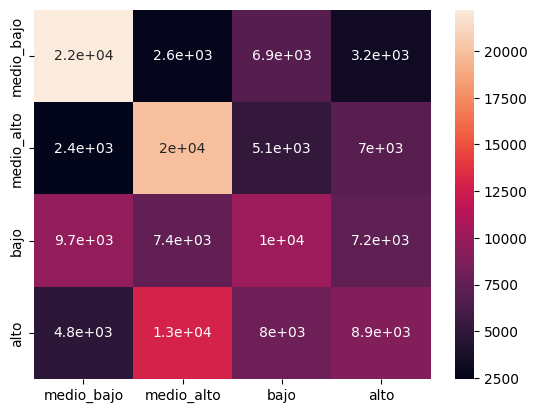

In [ ]:
import seaborn as sns
categorias = ['medio_bajo', 'medio_alto', 'bajo', 'alto']
sns.heatmap(MatrizConfusion, yticklabels=categorias, xticklabels=categorias, annot=True)
print('Exactitud = ', Exactitud)

#Hacer Prediciones

In [ ]:
rendimientoAcademico = model.predict(df_test)

In [ ]:
print(rendimientoAcademico)

[['bajo']
 ['alto']
 ['medio-alto']
 ...
 ['bajo']
 ['medio-alto']
 ['bajo']]


In [ ]:
print(len(rendimientoAcademico), len(CodigoEstudiantes))

138500 138500


In [ ]:
Final = CodigoEstudiantes.copy()
Final = pd.DataFrame(Final)
Final['RENDIMIENTO_ACADÉMICO'] = rendimientoAcademico.flatten()
Final.head()

,CÓDIGO,RENDIMIENTO_ACADÉMICO
0,345759,bajo
1,925052,alto
2,383355,medio-alto
3,70065,alto
4,8675,bajo


In [ ]:
Final.shape

(138500, 2)

In [ ]:
Final.to_csv('NeuroKupI.csv', index=False)